In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('anemia.csv')

In [ ]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
df.shape

(1421, 6)

In [ ]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

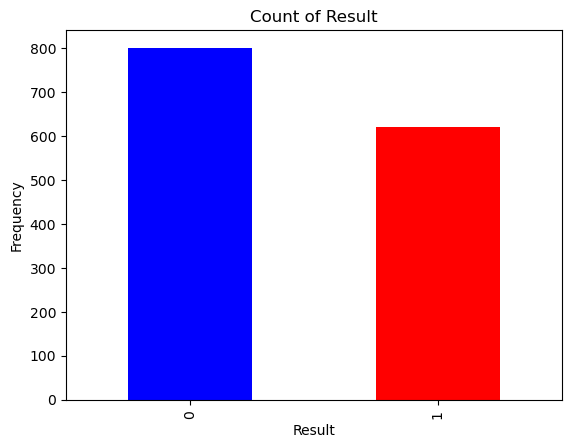

In [ ]:
# 0-> Anemia is not Present & 1-> Anemia is Present
# Checking for the count of anemia and not anemia
results = df['Result'].value_counts()
results.plot(kind='bar',color=['blue','red'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [ ]:
# We can see that the female count is more then the male count 
# We can balance the count of both by using undersample

from sklearn.utils import resample
majorclass = df[df['Result']==0]
minorclass = df[df['Result']==1]
major_downsample = resample(majorclass,replace=False, n_samples=len(minorclass),random_state=42)
df = pd.concat([major_downsample,minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


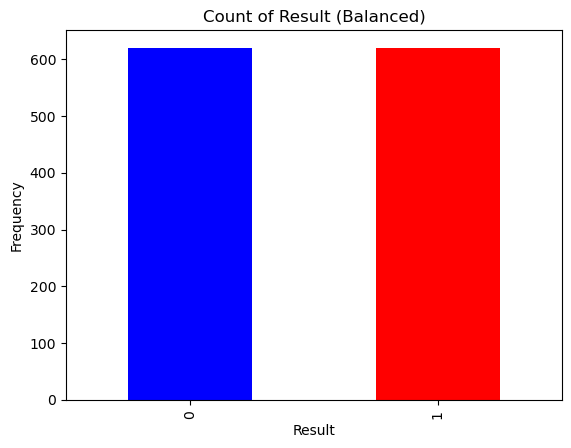

In [ ]:
#Plot the balanced gender counts
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind='bar',color=['blue','red'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result (Balanced)')
plt.show()

In [ ]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


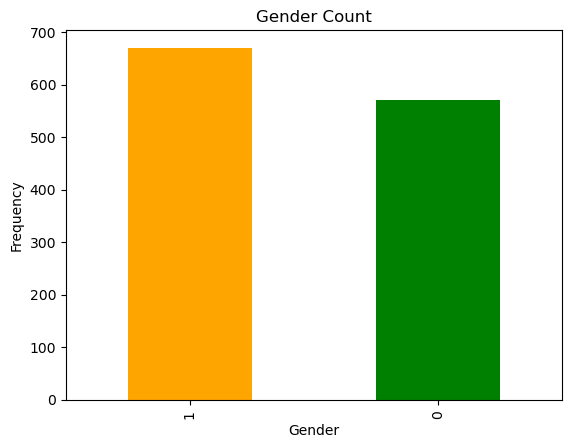

In [ ]:
output = df['Gender'].value_counts()
output.plot(kind = 'bar', color = ['orange','green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Count')
plt.show()

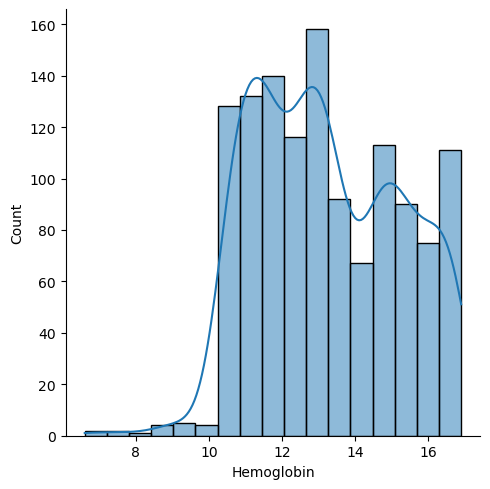

In [ ]:
sns.displot(df['Hemoglobin'],kde=True)

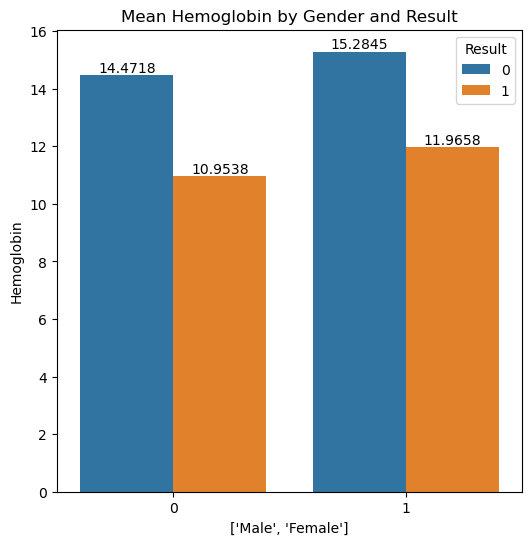

In [ ]:
plt.figure(figsize=(6,6))
ax=sns.barplot(y=df['Hemoglobin'],x=df['Gender'],hue=df['Result'],errorbar=None)
ax.set(xlabel=['Male','Female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Mean Hemoglobin by Gender and Result')
plt.show()

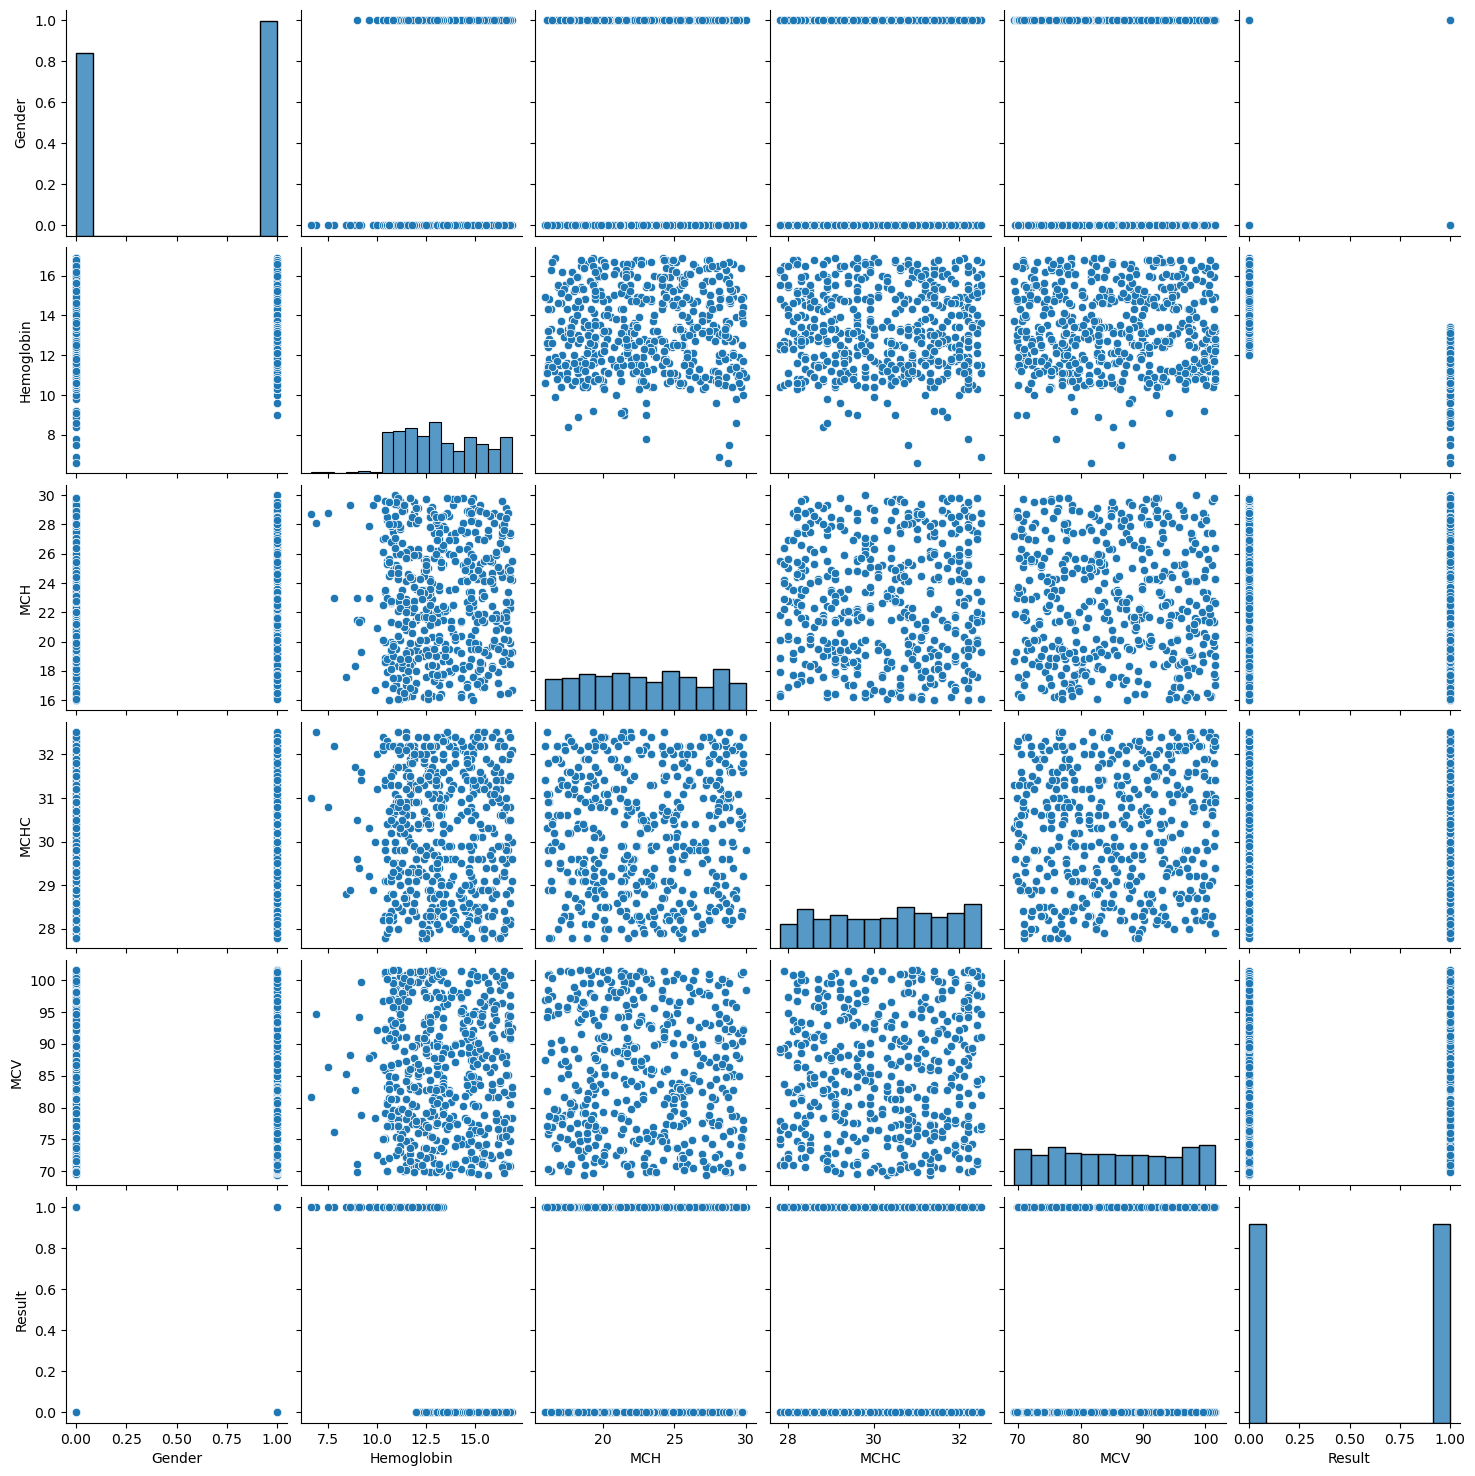

In [ ]:
sns.pairplot(df)   # PLoting Pair of All combination of plot

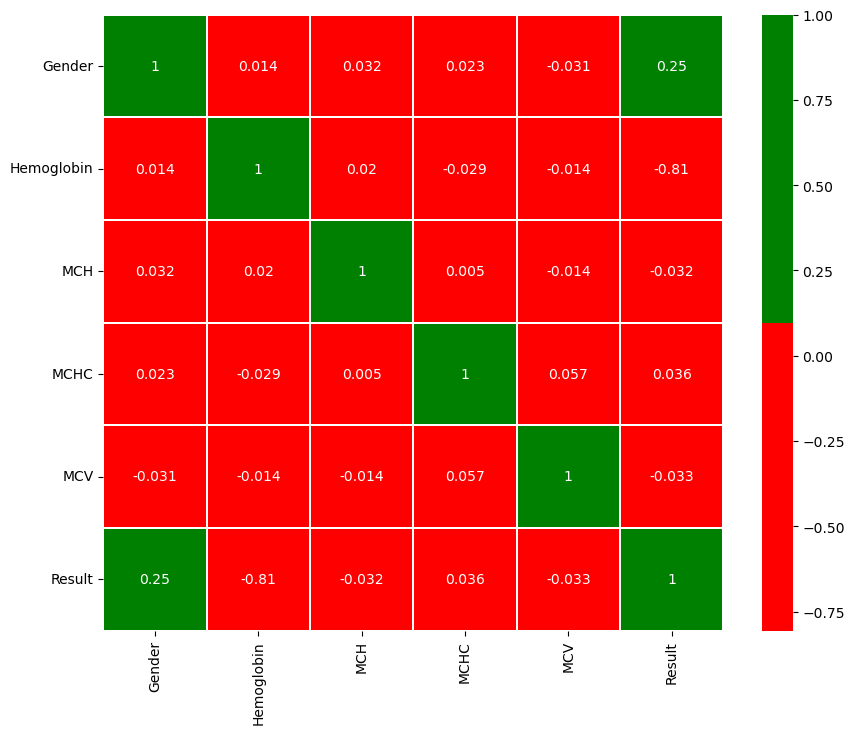

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap=['red','green'], linewidths=0.2)
            #data.corr() --> correlational matrix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()                   

In [ ]:
X = df.drop('Result', axis=1)  # Replace 'target_column' with your actual label column
Y = df['Result']

In [ ]:
X

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [ ]:
Y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [ ]:
#Logistic Regression Model
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)  # typo corrected

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print('Accuracy Score:', acc_lr)
print(c_lr)

Accuracy Score: 0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [ ]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
# Decision Tree Model
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test, y_pred)  # typo corrected
c_dt = classification_report(y_test, y_pred)

print('Accuracy Score:', acc_dt)
print(c_dt)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
# Gaussian Navies Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_nb)
print(c_nb)

Accuracy Score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [ ]:
#Support Vector Machine
from sklearn.svm import SVC

support_vector = SVC()
support_vector.fit(x_train,y_train)
y_pred = support_vector.predict(x_test)

acc_svc = accuracy_score(y_test,y_pred)
c_svc = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_svc)
print(c_svc)

Accuracy Score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)

acc_gbc = accuracy_score(y_test,y_pred)
c_gbc = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_gbc)
print(c_gbc)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
prediction = GBC.predict([[0,11.6,22.3,30.9,74.5]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction[0]

np.int64(1)

In [ ]:
if prediction[0] == 0:
    print("You don't have any Anemic Disease")
elif prediction[0] == 1:
    print("You have Anemic Disease")

You have Anemic Disease


In [ ]:
#Testing Model with Multiple Evaluation Metrics
model = pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier', 'RandomForest Classifier','Gaussian Navie Bayes','Support Vector Classifier','Gradient Boost Classifier'],'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gbc],})

In [ ]:
model

,Model,Score
0,Linear Regression,0.991935
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Navie Bayes,0.979839
4,Support Vector Classifier,0.939516
5,Gradient Boost Classifier,1.000000


In [ ]:
import pickle
import warnings
pickle.dump(GBC,open("model.pkl","wb"))
import numpy as np
from flask import Flask,request,render_template
app = Flask(__name__,static_url_path='/Flask/static')
model = pickle.load(open('model.pkl','rb'))
@app.route('/') #route to display the home page
def home():
    return render_template('index.html')

@app.route('/predict',methods=["POST"])
def predict(): 
   Gender = float(request.form["Gender"]) 
   Hemoglobin = float(request.form["Hemoglobin"])

   MCH = float(request.form['MCH'])
   MCHC = float(request.form['MCHC']) 
   MCV = float(request.form['MCV'])
   features_values = np.array([[Gender,Hemoglobin,MCH,MCHC,MCV]]) # reshape to 2D array
   df = pd.DataFrame(features_values, columns=['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'])  # variable name fixed
   print(df)

   prediction = model.predict(df)
   print(prediction[0])
   result = prediction[0]




In [ ]:
if prediction[0] == 0:
    result = "You don't have any Anemic Disease"
elif prediction[0] == 1:
    result = "You have Anemic Disease"
    
text = "Hence, Based on calculation: "
print(text + str(result))

# Example values for the features (replace with your actual input)
Gender = 0  # 0 for Male, 1 for Female
Hemoglobin = 11.6
MCH = 22.3
MCHC = 30.9
MCV = 74.5

features_values = np.array([[Gender, Hemoglobin, MCH, MCHC, MCV]])  # reshape to 2D array
df = pd.DataFrame(features_values, columns=['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'])
print(df)

prediction = model.predict(df)
print(prediction[0])
result = prediction[0]

if prediction[0] == 0:
    result = "You don't have any Anemic Disease"
elif prediction[0] == 1:
    result = "You have Anemic Disease"

text = "Hence, Based on calculation: "
print(text + str(result))

Hence, Based on calculation: You have Anemic Disease
   Gender  Hemoglobin   MCH  MCHC   MCV
0     0.0        11.6  22.3  30.9  74.5
1
Hence, Based on calculation: You have Anemic Disease


In [ ]:
if __name__ == "__main__":
    app.run(debug=False,port = 5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2025-07-26 18:56:05,328] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\ProgramData\anaconda3\Lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\ProgramData\anaconda3\Lib\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\ProgramData\anaconda3\Lib\site-packages\flask\app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "C:\Users\praja\AppData\Local\Temp\ipykernel_13496\1849472679.py", line 10, in home
    return render_template('index.html')
  File "c:\ProgramData\anac